In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __M

In [4]:
# 3
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen =  train_image_generator.flow_from_directory(
                  train_dir,
                  target_size = (IMG_HEIGHT, IMG_WIDTH),
                  batch_size = batch_size,
                  class_mode = 'binary')

val_data_gen =  validation_image_generator.flow_from_directory(
                train_dir,
                target_size = (IMG_HEIGHT, IMG_WIDTH),
                batch_size = batch_size,
                class_mode = 'binary')

test_data_gen =   test_image_generator.flow_from_directory(
                  PATH,
                  target_size = (IMG_HEIGHT, IMG_WIDTH),
                  batch_size = batch_size,
                  classes = ['test'],
                  shuffle = False)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


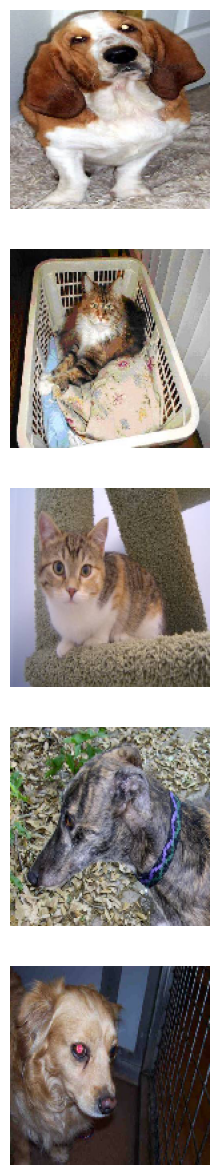

In [5]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [6]:
# 5
train_image_generator = ImageDataGenerator(
                                            rescale=1./255,
                                            horizontal_flip=True,
                                            rotation_range=20,
                                            zoom_range=0.15,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.15,
                                            fill_mode="nearest")


Found 2000 images belonging to 2 classes.


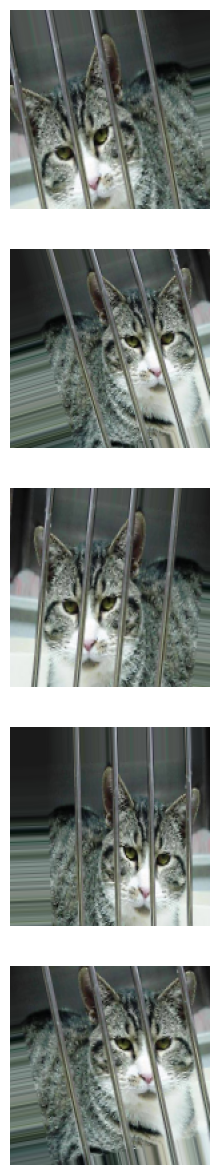

In [7]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [8]:
# 7
model = Sequential()

# Convolutional Base.

# Layer 1
#The input shape of our data will be IMG_HEIGHT(150), IMG_WIDTH(150), 3 and we will process 32 filters of size 3x3 over our input data. 
# We will also apply the activation function relu to the output of each convolution operation.

model.add(Conv2D(32, (3,3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), activation='relu'))

#Layer 2
#This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

model.add(MaxPooling2D(pool_size=(2, 2)))

# Other Layers
# The next set of layers do very similar things but take as input the feature map from the previous layer. 
# They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, 
# meaning we can afford (computationally) to add more depth.

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Adding Dense Layers

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)      

In [9]:
# 8

from math import ceil

train_steps = int(ceil(1. * total_train / batch_size))
val_steps   = int(ceil(1. * total_val / batch_size))

#print(train_steps, val_steps)

history = model.fit(
            train_data_gen, steps_per_epoch=train_steps,
            validation_data=val_data_gen, validation_steps=val_steps,
            epochs=epochs)

Epoch 1/15
16/16 [==============================] - 144s 9s/step - loss: 0.7273 - accuracy: 0.5065 - val_loss: 0.6958 - val_accuracy: 0.5156
Epoch 2/15
16/16 [==============================] - 122s 8s/step - loss: 0.6914 - accuracy: 0.5045 - val_loss: 0.6883 - val_accuracy: 0.5918
Epoch 3/15
16/16 [==============================] - 121s 8s/step - loss: 0.6904 - accuracy: 0.5315 - val_loss: 0.6886 - val_accuracy: 0.5479
Epoch 4/15
16/16 [==============================] - 117s 7s/step - loss: 0.6787 - accuracy: 0.5645 - val_loss: 0.6557 - val_accuracy: 0.5947
Epoch 5/15
16/16 [==============================] - 121s 8s/step - loss: 0.6746 - accuracy: 0.5615 - val_loss: 0.6396 - val_accuracy: 0.6396
Epoch 6/15
16/16 [==============================] - 131s 8s/step - loss: 0.6506 - accuracy: 0.5955 - val_loss: 0.6358 - val_accuracy: 0.5830
Epoch 7/15
16/16 [==============================] - 123s 8s/step - loss: 0.6488 - accuracy: 0.6190 - val_loss: 0.5988 - val_accuracy: 0.6436
Epoch 8/15
16

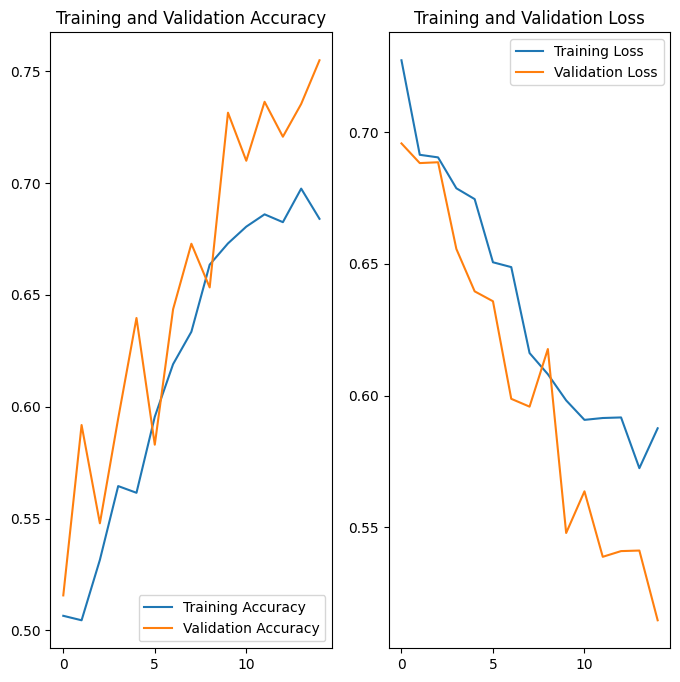

In [10]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
probabilities = model.predict(test_data_gen).flatten()
probabilities

1/1 [==============================] - 2s 2s/step


array([0.6677654 , 0.35113177, 0.09372529, 0.7479794 , 0.50483143,
       0.4663671 , 0.7331066 , 0.35103428, 0.56953925, 0.97307754,
       0.32909852, 0.6625673 , 0.39528492, 0.2748486 , 0.6087588 ,
       0.86884636, 0.80489135, 0.9669649 , 0.7234056 , 0.80569726,
       0.1647725 , 0.58517426, 0.42537504, 0.572448  , 0.6443317 ,
       0.43010235, 0.95903975, 0.48792872, 0.5537783 , 0.7788393 ,
       0.4037431 , 0.28693777, 0.90821034, 0.9999569 , 0.3574835 ,
       0.85800976, 0.99761105, 0.6404249 , 0.5612176 , 0.4512833 ,
       0.61401296, 0.485056  , 0.98384374, 0.5633732 , 0.24818964,
       0.4226593 , 0.54067457, 0.29288447, 0.4159731 , 0.30181828],
      dtype=float32)

In [12]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 78.0% of the images of cats and dogs.
You passed the challenge!
